Realizamos un análisis de los dataframe ya depurados. "user_review", "steam_games" y "user_items". Analizaremos tendencias y variables más importantes.

Importamos las librerías

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")



Extraccion de los datos a partir de los archivos csv

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving User_review_limpio.csv to User_review_limpio.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving User_items_limpio.csv to User_items_limpio.csv


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Steam_games_limpio.csv to Steam_games_limpio.csv


EDA Steam Games

In [ ]:
df_steam_games = pd.read_csv("Steam_games_limpio.csv")

In [ ]:
df_steam_games.shape #Apreciamos que contamos con 28899 registros y 8 columnas#

(28899, 8)

In [ ]:
df_steam_games.columns

Index(['app_name', 'title', 'id', 'developer', 'price_number', 'release_year',
       'main_genre', 'igualdad'],
      dtype='object')

In [ ]:
df_steam_games.info() #No se aprecian valores nulos#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28899 entries, 0 to 28898
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   app_name      28899 non-null  object 
 1   title         28899 non-null  object 
 2   id            28899 non-null  float64
 3   developer     28899 non-null  object 
 4   price_number  28899 non-null  float64
 5   release_year  28899 non-null  int64  
 6   main_genre    28899 non-null  object 
 7   igualdad      28899 non-null  bool   
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
df_subset_steam_games = df_steam_games[["release_year","price_number"]]
df_subset_steam_games.describe()

,release_year,price_number
count,28899.000000,28899.000000
mean,2014.850618,8.622521
std,3.253389,15.794376
min,1983.000000,0.000000
25%,2014.000000,1.990000
50%,2016.000000,4.990000
75%,2017.000000,9.990000
max,2021.000000,995.000000


In [ ]:
print("Valores únicos de main_genre:", df_steam_games["main_genre"].unique()) #Nos brinda información sobre el genero de los juegos#

Valores únicos de main_genre: ['Action' 'Free to Play' 'Casual' 'Adventure' 'Racing' 'Strategy' 'Indie'
 'RPG' 'Simulation' 'Sports' 'Massively Multiplayer' 'Sin Dato'
 'Animation &amp; Modeling' 'Utilities' 'Education'
 'Design &amp; Illustration' 'Audio Production' 'Video Production'
 'Software Training' 'Accounting' 'Web Publishing' 'Photo Editing'
 'Early Access']


In [ ]:
ranking_generos = df_steam_games["main_genre"].value_counts()
top_10_gen= ranking_generos.head(10)
top_10_gen
#Con esto analizamos los géneros de acuerdo a su popularidad#

Action                       11268
Casual                        4339
Adventure                     4324
Indie                         3300
Simulation                    1844
Strategy                      1127
RPG                            684
Free to Play                   517
Racing                         454
Design &amp; Illustration      327
Name: main_genre, dtype: int64

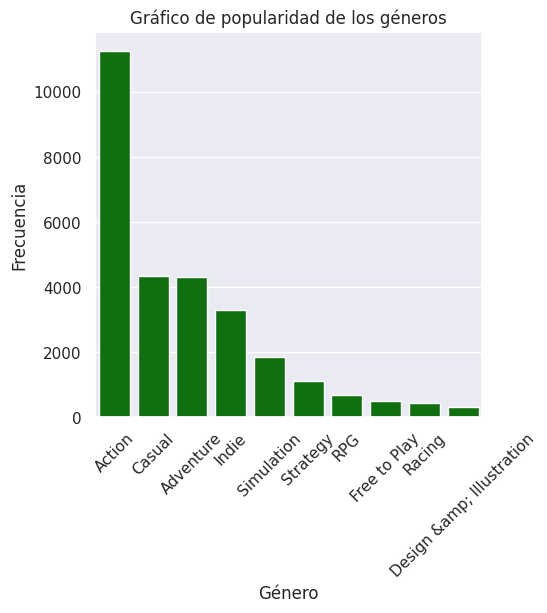

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(x=top_10_gen.index, y=top_10_gen.values, color="green")
plt.title("Gráfico de popularidad de los géneros")
plt.xlabel("Género")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()

In [ ]:
ranking_developers = df_steam_games["developer"].value_counts()
ranking_developers.head(10) #Detallamos a los desarrolladores de videojuegos"

Ubisoft - San Francisco       1259
SmiteWorks USA, LLC            813
Dovetail Games                 253
KOEI TECMO GAMES CO., LTD.     232
Paradox Development Studio     156
Capcom                         130
Ronimo Games                   123
Choice of Games                100
Musopia                         95
Stainless Games                 95
Name: developer, dtype: int64

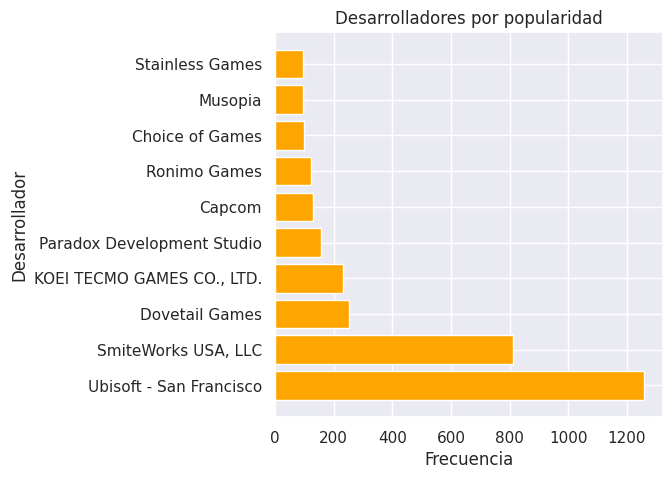

In [ ]:
top_10_developer = df_steam_games ["developer"].value_counts().head(10)
plt.figure(figsize=(5, 5))
plt.barh(top_10_developer.index, top_10_developer.values, color="orange")
plt.title("Desarrolladores por popularidad")
plt.ylabel("Desarrollador")
plt.xlabel("Frecuencia")
plt.show()

**Podemos observar que los dos desarrolladores que más juegos desarrollan sacan una gran diferencia por sobre el resto**

In [ ]:
ranking_developers = df_steam_games["developer"].value_counts()
ranking_developers.tail(10)

RDavis                                      1
Vladimir Alekseev                           1
Enrick Lambert                              1
Frostbullet                                 1
Royal9Games,RoyalJL                         1
Salus Games                                 1
Class of  2016-2017                         1
Pirotexnik                                  1
ElVery333,Raquel Covelo Suarez,ATopeCode    1
Bidoniera Games                             1
Name: developer, dtype: int64

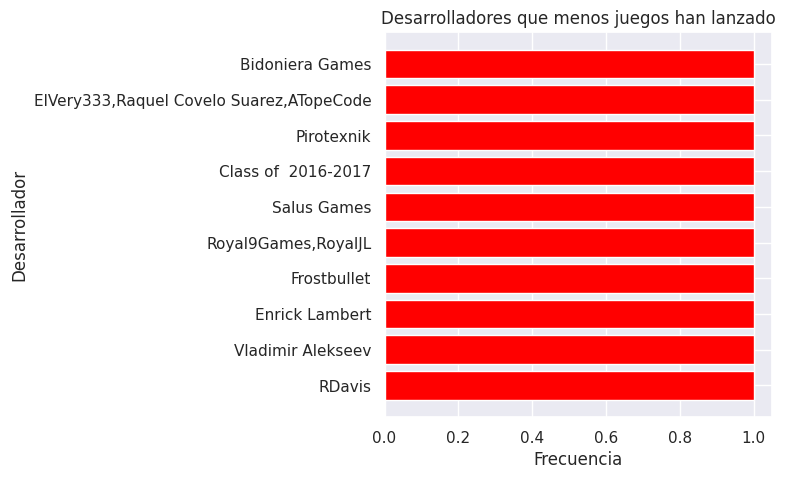

In [ ]:
top_10_developer_tail = df_steam_games["developer"].value_counts().tail(10)
plt.figure(figsize=(5, 5))
plt.barh(top_10_developer_tail.index, top_10_developer_tail.values, color="red")
plt.title("Desarrolladores que menos juegos han lanzado")
plt.ylabel("Desarrollador")
plt.xlabel("Frecuencia")
plt.show()

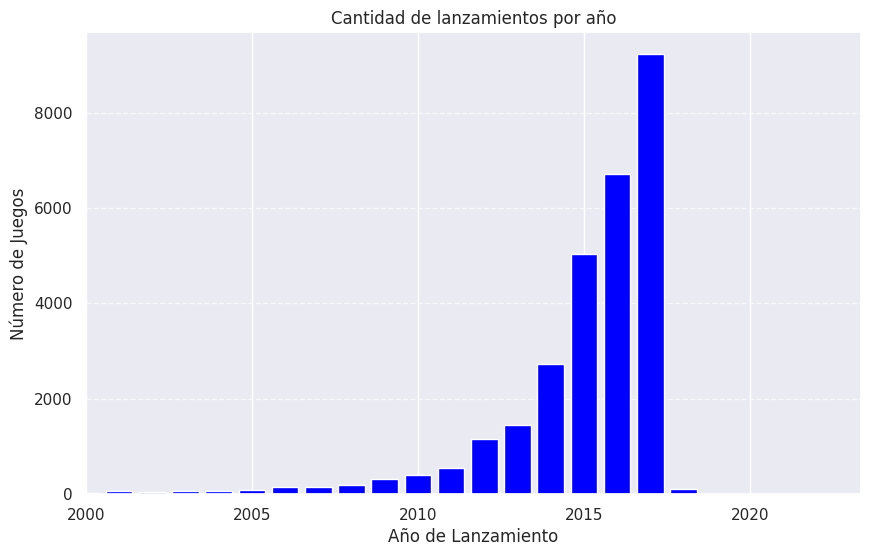

In [ ]:
release_year_counts = df_steam_games["release_year"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(release_year_counts.index, release_year_counts.values, color="blue")
plt.title("Cantidad de lanzamientos por año")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Número de Juegos")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xlim(left=2000)
plt.show()

In [ ]:
release_year_counts = df_steam_games["release_year"].value_counts()
release_year_counts.head(10)
#Al analizar los números podemos apreciar que cada la cantidad de lanzamientos es superior en comparación a los años anteriores y puntualmente, al año anterior#
#El año 2017 fue el año de mayor cantidad de lanzamientos#

2017    9221
2016    6713
2015    5042
2014    2739
2013    1459
2012    1159
2011     553
2010     403
2009     320
2008     196
Name: release_year, dtype: int64

<Figure size 1400x800 with 0 Axes>

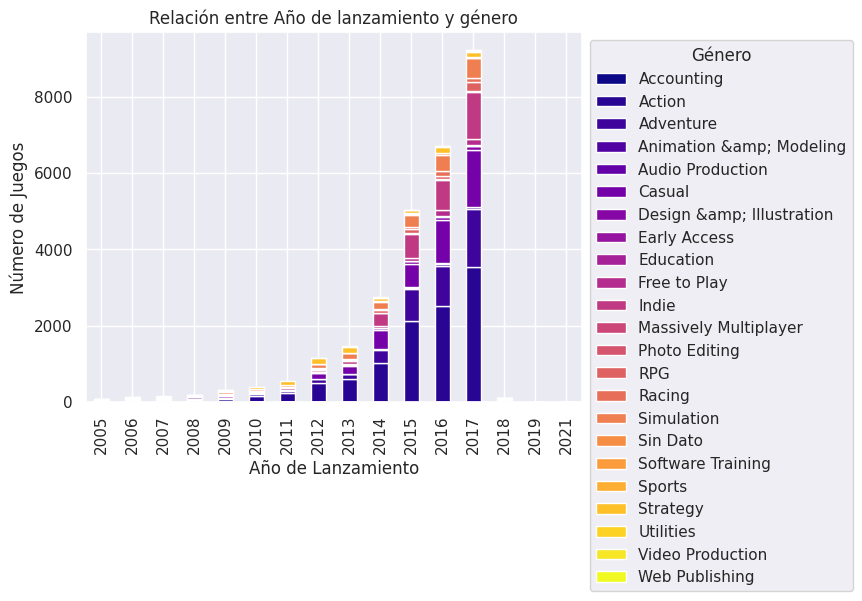

In [ ]:
pivot_table = df_steam_games.pivot_table(index="release_year", columns="main_genre", aggfunc="size", fill_value=0)
pivot_table = pivot_table[pivot_table.index >= 2005]
plt.figure(figsize=(14, 8))
pivot_table.plot(kind="bar", stacked=True, colormap="plasma")
plt.title("Relación entre Año de lanzamiento y género")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Número de Juegos")
plt.legend(title="Género", bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

<Figure size 1400x800 with 0 Axes>

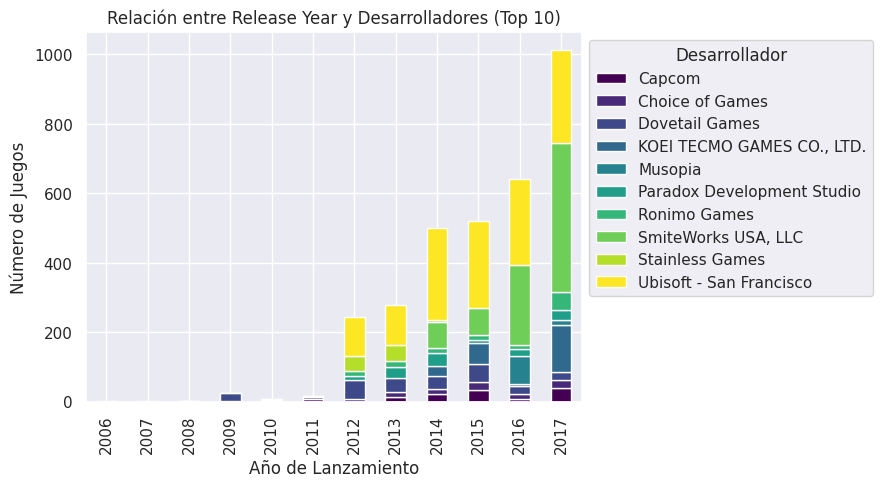

In [ ]:
top_10_developers_ = df_steam_games["developer"].value_counts().head(10).index
df_top_developers = df_steam_games[df_steam_games["developer"].isin(top_10_developers_)]
pivot_table_developers = df_top_developers.pivot_table(index='release_year', columns='developer', aggfunc='size', fill_value=0)
pivot_table_developers = pivot_table_developers[pivot_table_developers.index >= 2005]
plt.figure(figsize=(14, 8))
pivot_table_developers.plot(kind="bar", stacked=True, colormap="viridis")
plt.title("Relación entre Release Year y Desarrolladores (Top 10)")
plt.xlabel("Año de Lanzamiento")
plt.ylabel("Número de Juegos")
plt.legend(title="Desarrollador", bbox_to_anchor=(1, 1), loc="upper left")
plt.show()

**EDA Reviews**

In [ ]:
df_user_review = pd.read_csv("User_review_limpio.csv")

In [ ]:
df_user_review.shape #Apreciamos que contamos con 57568 registros y 5 columnas#

(57568, 5)

In [ ]:
df_user_review.columns

Index(['user_id', 'item_id', 'recommend', 'sentiment_analysis', 'year_posted'], dtype='object')

In [ ]:
df_user_review.info() #No se aprecian valores nulos#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57568 entries, 0 to 57567
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             57568 non-null  object
 1   item_id             57568 non-null  int64 
 2   recommend           57568 non-null  bool  
 3   sentiment_analysis  57568 non-null  int64 
 4   year_posted         57568 non-null  int64 
dtypes: bool(1), int64(3), object(1)
memory usage: 1.8+ MB


In [ ]:
df_user_review.describe()

,item_id,sentiment_analysis,year_posted
count,57568.000000,57568.000000,57568.000000
mean,169476.117096,1.394942,2013.951918
std,132011.392650,0.638548,0.880681
min,10.000000,0.000000,2010.000000
25%,8930.000000,1.000000,2013.000000
50%,218230.000000,1.000000,2014.000000
75%,261640.000000,2.000000,2015.000000
max,527340.000000,2.000000,2015.000000


In [ ]:
df_user_review["user_id"].value_counts()
#Algunos usuarios brindaron 10 comentarios, que fue el número máximo y otros realizaron solo 1 comentario#

BrahJimbo            10
76561198076481365    10
76561198080345478    10
HyperionDooM93       10
Capscain             10
                     ..
76561198098447960     1
76561198047306749     1
Varck                 1
76561198106998900     1
JDMBRAH               1
Name: user_id, Length: 25149, dtype: int64

Variable Posted - Nos indica el año en el que se hizo la review.

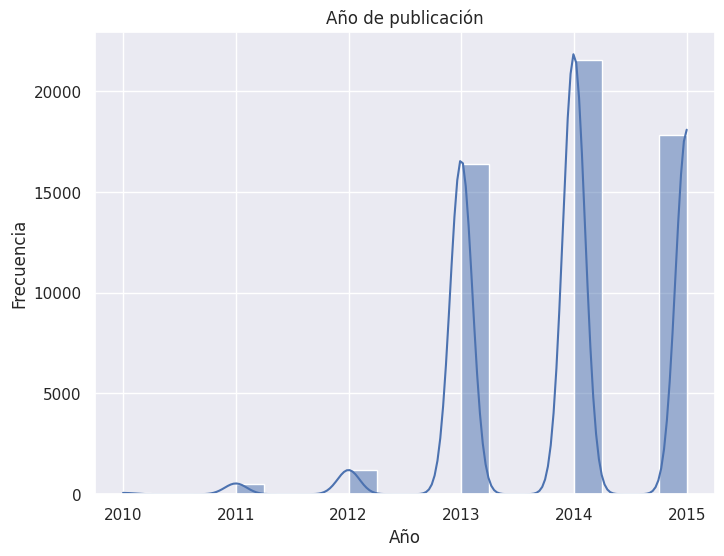

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df_user_review['year_posted'], bins=20, kde=True)
plt.title('Año de publicación')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
df_user_review["year_posted"].value_counts() #Se realizaron mayor cantidad de reviews en el año 2014#

2014    21561
2015    17840
2013    16386
2012     1187
2011      528
2010       66
Name: year_posted, dtype: int64

**Item_id**

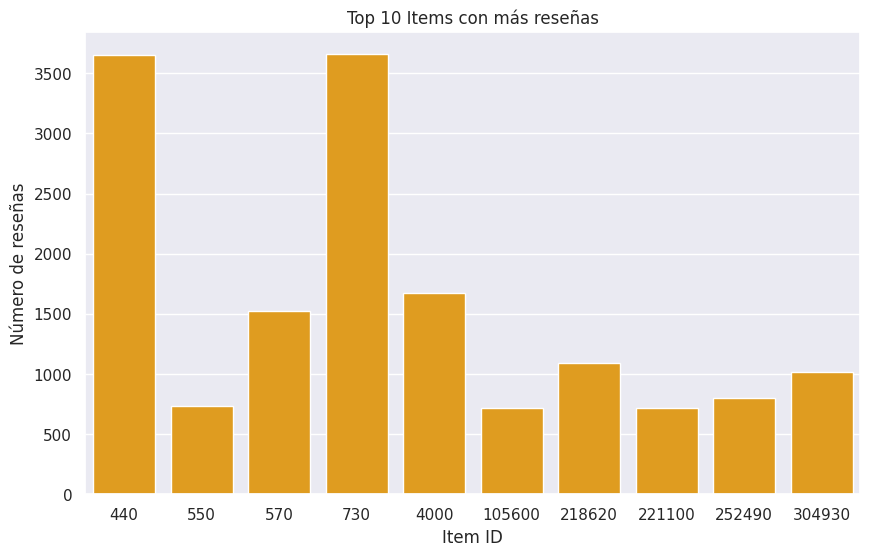

In [ ]:
top_items = df_user_review["item_id"].value_counts()
top_10_items = top_items.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_items.index, y=top_10_items.values, color="orange")
plt.title("Top 10 Items con más reseñas")
plt.xlabel("Item ID")
plt.ylabel("Número de reseñas")
plt.show()

In [ ]:
top_10_items #Los ítems con más reseñas fueron 730 y 440#

730       3658
440       3652
4000      1673
570       1527
218620    1090
304930    1013
252490     797
550        734
221100     721
105600     718
Name: item_id, dtype: int64

**Análisis de sentimiento - "sentiment_analysis"**

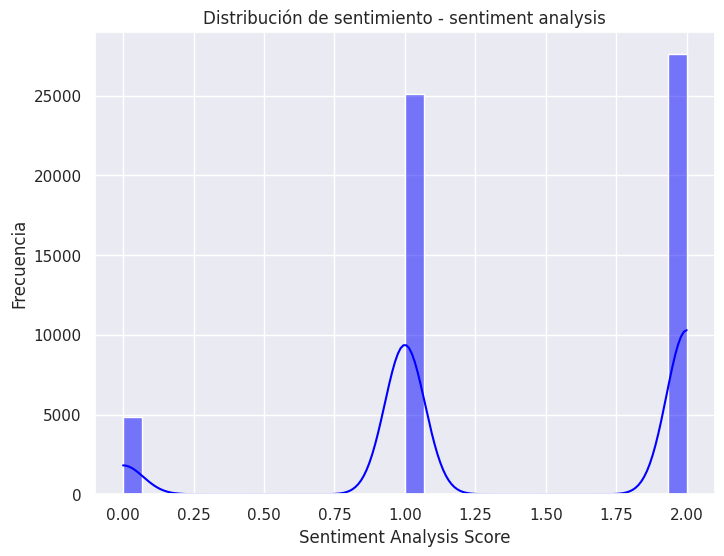

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df_user_review["sentiment_analysis"], bins=30, kde=True, color="blue")
plt.title("Distribución de sentimiento - sentiment analysis")
plt.xlabel("Sentiment Analysis Score")
plt.ylabel("Frecuencia")
plt.show() #0 es negativa, 1 es neutral y 2 es positiva#

In [ ]:
#Vamos a analizar la cantidad de reviews positivos, neutros, negativos#
sentiment_analysis_0 = df_user_review[df_user_review["sentiment_analysis"] == 0].value_counts().sum()
sentiment_analysis_1 = df_user_review[df_user_review["sentiment_analysis"] == 1].value_counts().sum()
sentiment_analysis_2 = df_user_review[df_user_review["sentiment_analysis"] == 2].value_counts().sum()
print(f"Reviews Negativos: {sentiment_analysis_0}")
print(f"Reviews Neutras: {sentiment_analysis_1}")
print(f"Reviews Positivas: {sentiment_analysis_2}")

Reviews Negativos: 4858
Reviews Neutras: 25116
Reviews Positivas: 27594


Correlaciones - Relación entre usuarios e items que consumieron

In [ ]:
user_items = df_user_review.pivot_table(index="user_id",columns="item_id", values="recommend", aggfunc="count", fill_value=0)
item_mas_consumido_x_usuario = user_items.idxmax(axis=1)
conteo_review_x_usuario = user_items.max(axis=1)
user_most_reviewed_item = pd.DataFrame({'Item con mas reviews': item_mas_consumido_x_usuario, 'Conteo de reviews': conteo_review_x_usuario})
user_most_reviewed_item

,Item con mas reviews,Conteo de reviews
user_id,,
--000--,1250,1
--ace--,440,1
--ionex--,730,1
-2SV-vuLB-Kg,440,1
-Azsael-,226860,1
...,...,...
zwanzigdrei,440,1
zy0705,440,1
zynxgameth,204300,1


Relacion entre usuarios y reviews realizadas por año

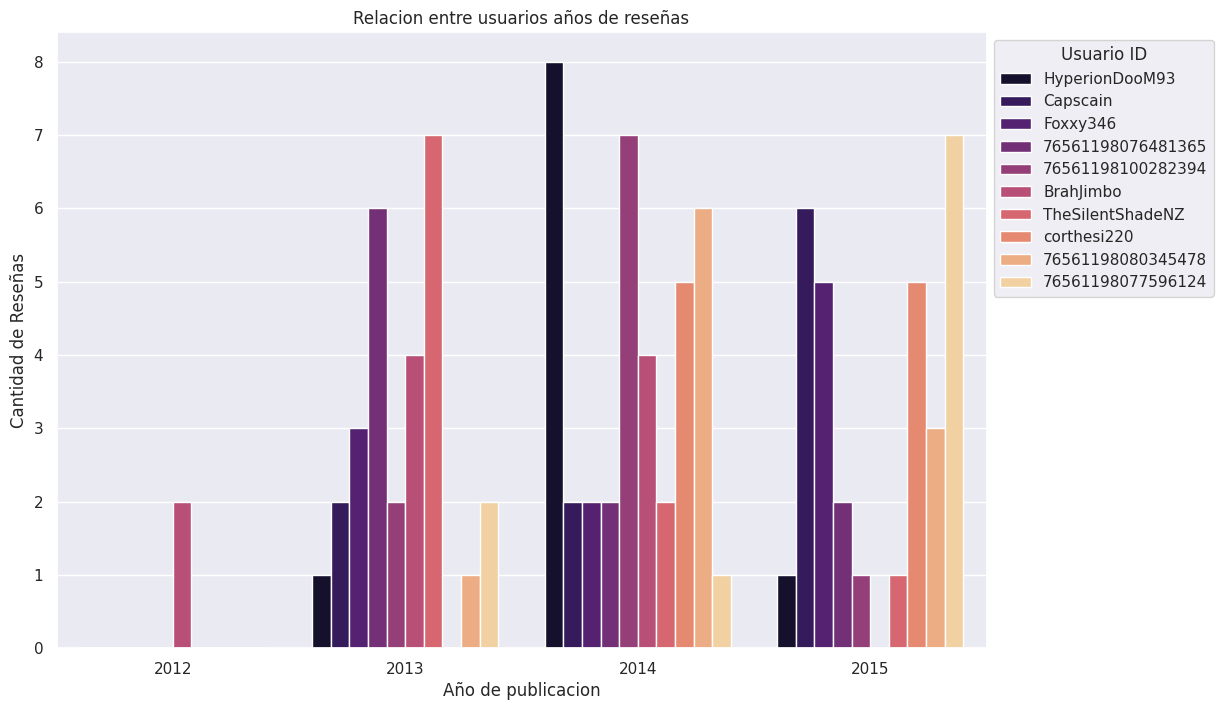

In [ ]:
top_users = df_user_review['user_id'].value_counts().head(10)
top_users_review = df_user_review[df_user_review["user_id"].isin(top_users.index)]
plt.figure(figsize=(12,8))
sns.countplot(x="year_posted", hue="user_id", data=top_users_review, palette="magma")
plt.title("Relacion entre usuarios años de reseñas")
plt.ylabel("Cantidad de Reseñas")
plt.xlabel("Año de publicacion")
plt.legend(title="Usuario ID", bbox_to_anchor=(1,1), loc="upper left")
plt.show()

**Relación - Usuario y Recomendación**

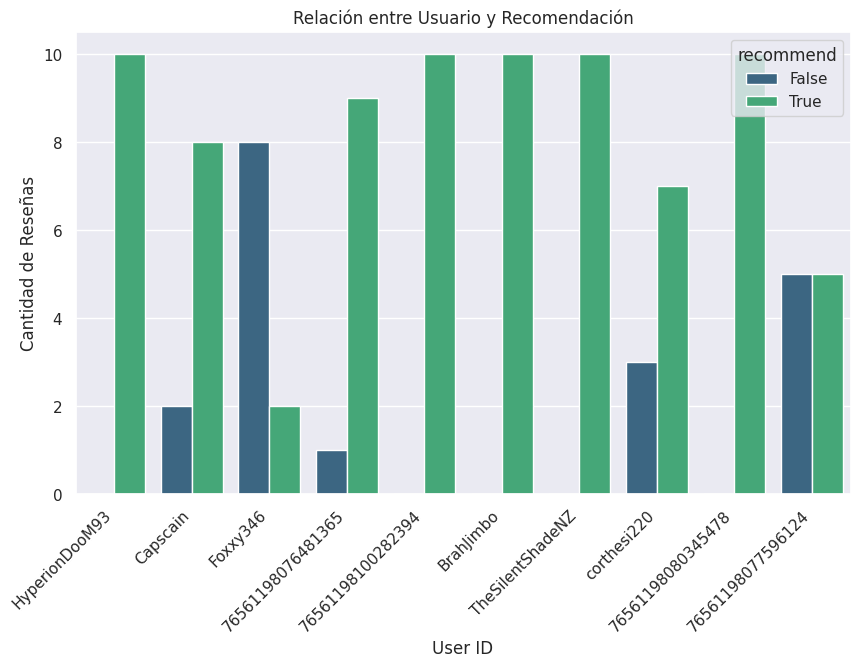

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="user_id", hue="recommend", data=df_user_review[df_user_review["user_id"].isin(top_users.index)], palette="viridis")
plt.title("Relación entre Usuario y Recomendación")
plt.xlabel("User ID")
plt.ylabel("Cantidad de Reseñas")
plt.xticks(rotation=45, ha="right")
plt.show()

**Relación entre Recomendación y Análisis de Sentimientos**

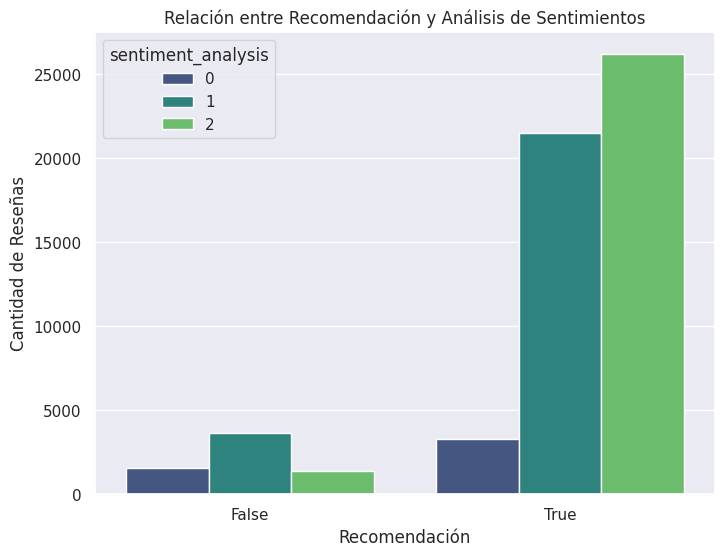

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x="recommend", hue="sentiment_analysis", data=df_user_review, palette="viridis")
plt.title("Relación entre Recomendación y Análisis de Sentimientos")
plt.xlabel("Recomendación")
plt.ylabel("Cantidad de Reseñas")
plt.show()

**EDA Items**

In [ ]:
df_items = pd.read_csv("User_items_limpio.csv")

In [ ]:
df_items.shape

(5170015, 5)

In [ ]:
df_items.columns

Index(['user_id', 'items_count', 'item_id', 'item_name', 'playtime_forever'], dtype='object')

In [ ]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5170015 entries, 0 to 5170014
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   items_count       int64  
 2   item_id           float64
 3   item_name         object 
 4   playtime_forever  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 197.2+ MB


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_items.describe()

,items_count,item_id,playtime_forever
count,5170015.000,5153209.000,5153209.000
mean,313.700,178448.141,991.495
std,692.464,131859.776,5418.204
min,0.000,10.000,0.000
25%,71.000,34460.000,0.000
50%,137.000,214420.000,34.000
75%,275.000,266430.000,355.000
max,7762.000,530720.000,642773.000


Luego de estas líneas de código podemos llegar al siguiente análisis:


*  Contamos con 5170015 registros y 5 columnas
*  Contamos con datos tipo int object y float



In [ ]:
if df_items["user_id"].nunique() == len(df_items):
    print("Todos los user_ids son únicos.")
else:
    print("Hay duplicados en los user_ids.") #Esto demuestra que los usuarios pueden haber jugado más que un solo juego y por eso contamos con valores duplicados#

Hay duplicados en los user_ids.


In [ ]:
df_items["items_count"].describe()

count   5170015.000
mean        313.700
std         692.464
min           0.000
25%          71.000
50%         137.000
75%         275.000
max        7762.000
Name: items_count, dtype: float64

El 75% de los usuarios consumieron de 1 a 275 juegos. El 50% consumió de 1 a 137 y el 25% de 1 a 71. El máximo consumidor jugó 7762 juegos.

In [ ]:
top_10_juegos = df_items["item_name"].value_counts().head(10)
top_10_juegos

Dota 2 Test                         49571
Counter-Strike: Global Offensive    43776
Garry's Mod                         43301
Unturned                            38682
Left 4 Dead 2                       37044
Left 4 Dead 2 Beta                  37044
Terraria                            29239
Warframe                            25807
Portal 2                            24465
Counter-Strike: Source              24220
Name: item_name, dtype: int64

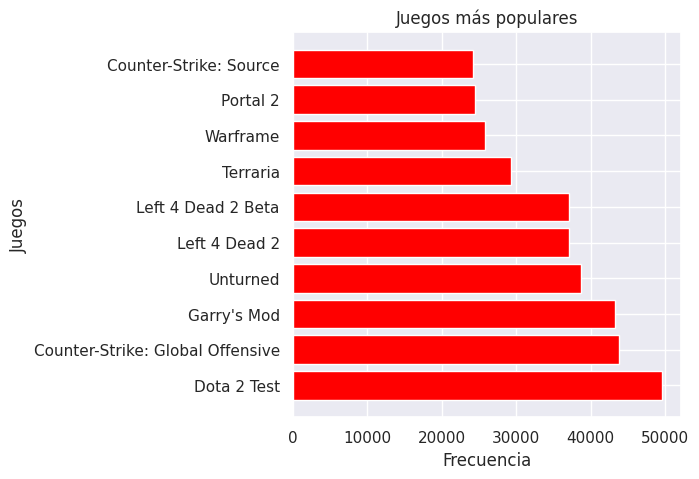

In [ ]:
plt.figure(figsize=(5, 5))
plt.barh(top_10_juegos.index, top_10_juegos.values, color="red")
plt.title("Juegos más populares")
plt.ylabel("Juegos")
plt.xlabel("Frecuencia")
plt.show()

In [ ]:
df_items["playtime_hours"] = df_items["playtime_forever"]/60
df_items["playtime_hours"].describe()

count   5153209.000
mean         16.525
std          90.303
min           0.000
25%           0.000
50%           0.567
75%           5.917
max       10712.883
Name: playtime_hours, dtype: float64

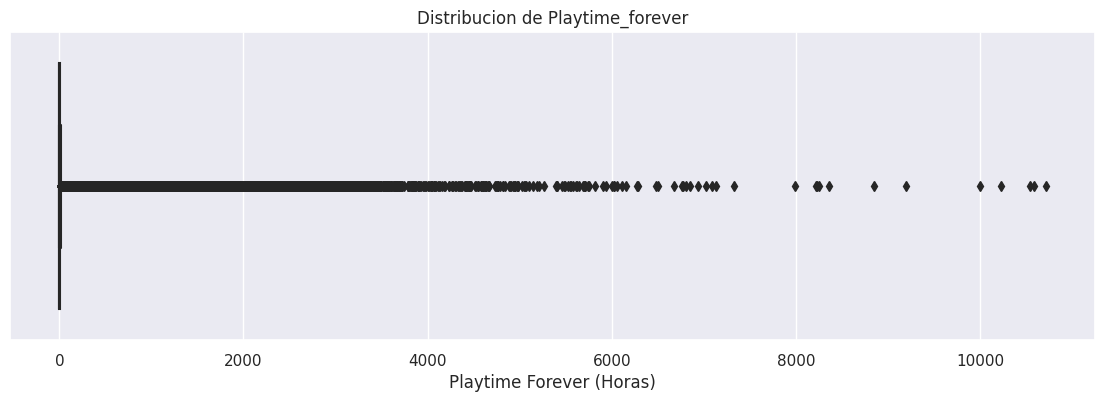

In [ ]:
plt.figure(figsize=(14, 4))
sns.boxplot(x=df_items["playtime_hours"], color="purple")
plt.title("Distribucion de Playtime_forever")
plt.xlabel("Playtime Forever (Horas)")
plt.show()

In [ ]:
Q1 = df_items["playtime_hours"].quantile(0.25)
Q3 = df_items["playtime_hours"].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df_items[(df_items["playtime_hours"] < lower_limit) | (df_items["playtime_hours"] > upper_limit)]
num_outliers = len(outliers)
print(f'Número de valores atípicos: {num_outliers}')
outliers_up = df_items[(df_items["playtime_hours"] > upper_limit)]
num_outliers_up = len(outliers_up)
print(f'Número de valores atípicos: {num_outliers_up}')
print(upper_limit)

Número de valores atípicos: 773155
Número de valores atípicos: 773155
14.791666666666668


El 75% de los usuarios juegan a un juego alrededor de 0 a 5.700 horas. Tenemos 773155 valores atípicos que se encuentran por arriba de 14.79 horas.

std          90.303
min           0.000
25%           0.000
50%           0.567
75%           5.917

In [ ]:
df_items["item_id"].value_counts().head(10)

205790.000    49571
730.000       43776
4000.000      43301
304930.000    38682
223530.000    37044
550.000       37044
105600.000    29239
230410.000    25807
620.000       24465
240.000       24220
Name: item_id, dtype: int64

In [ ]:
total_playtime_by_item = df_items.groupby("item_id")["playtime_hours"].sum().sort_values(ascending=False)
top_items = total_playtime_by_item.head(5)
top_items

item_id
730.000      13086404.450
4000.000      7472776.933
105600.000    2582909.017
72850.000     2277977.100
230410.000    2067128.383
Name: playtime_hours, dtype: float64

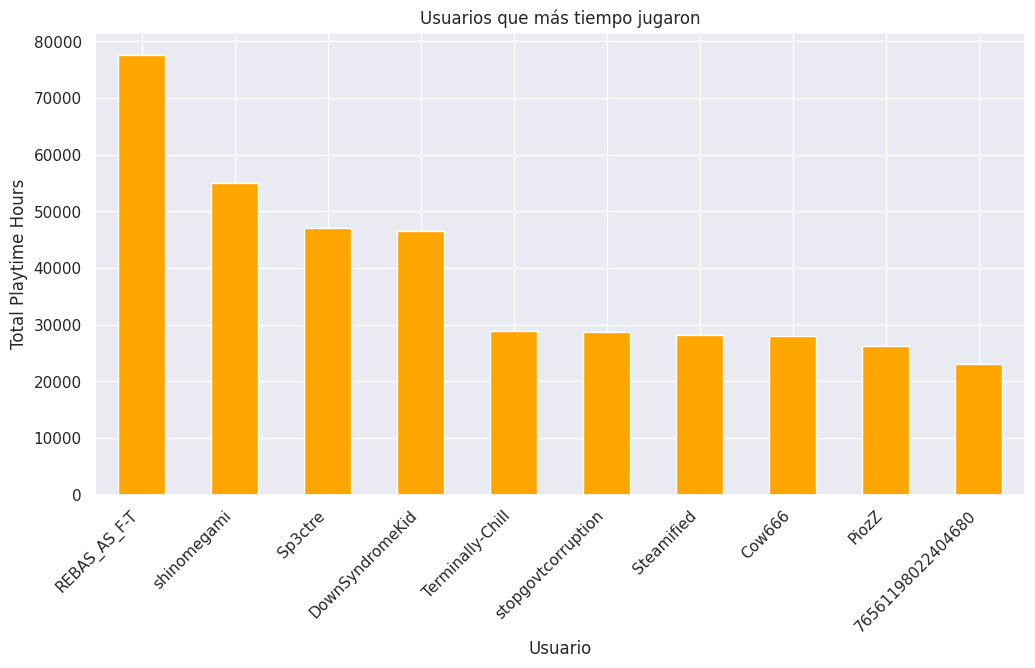

In [ ]:
total_playtime_by_user = df_items.groupby("user_id")["playtime_hours"].sum().sort_values(ascending=False)
top_users = total_playtime_by_user.head(10)

plt.figure(figsize=(12, 6))
top_users.plot(kind="bar", color="orange")
plt.title("Usuarios que más tiempo jugaron")
plt.xlabel("Usuario")
plt.ylabel("Total Playtime Hours")
plt.xticks(rotation=45, ha="right")
plt.show()

In [ ]:
df_ordenado_x_itemcount = df_items.sort_values(by="items_count", ascending=False)

usuario_mayor_item_count = df_ordenado_x_itemcount.iloc[0]["user_id"]
mayor_item_count = df_ordenado_x_itemcount.iloc[0]["items_count"]

print(f'Usuario con el mayor item_count: {usuario_mayor_item_count}')
print(f'Mayor item_count: {mayor_item_count}')

Usuario con el mayor item_count: phrostb
Mayor item_count: 7762


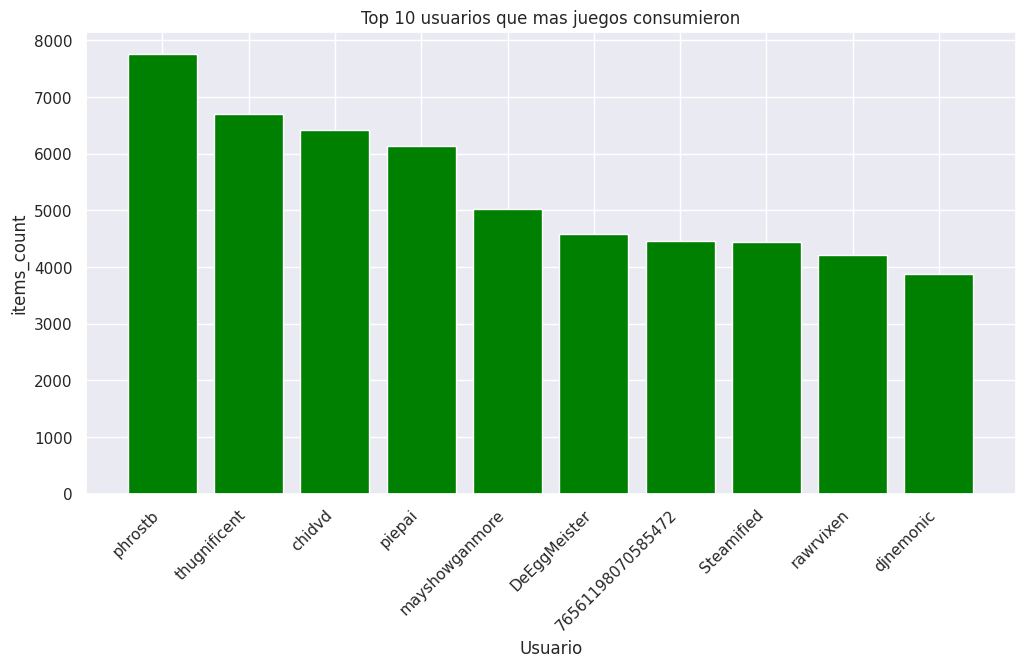

In [ ]:
items_count_user = df_items.groupby("user_id")["items_count"].max().sort_values(ascending=False)
top_users = items_count_user.head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_users.index, top_users.values, color="green")
plt.title("Top 10 usuarios que mas juegos consumieron")
plt.xlabel("Usuario")
plt.ylabel("items_count")
plt.xticks(rotation=45, ha="right")
plt.show()